In [1]:
from file_parser import *

In [2]:
pdf_file_path = "../files/swan.pdf"
content = FileParser(pdf_file_path).parse()
print(content)

2024-01-17 14:57:18.819 | INFO     | file_parser:parse:47 - parse file: ../files/swan.pdf


([Document(page_content='彩页\n华为CloudEngine 9860-4C-\nEI-A数据中心交换机详版彩页\nCloudEngine 9860-4C-EI-A 系列是华为公司面向数据中心推\n出的新一代高性能、高密度、低时延灵活插卡以太网交换机。\nwww.huawei.com', metadata={'source': '../files/swan.pdf', 'file_path': '../files/swan.pdf', 'page': 0, 'total_pages': 11, 'Author': 'Huawei Technologies Co.,Ltd.', 'Company': 'Huawei Technologies Co.,Ltd.', 'ContactInfo': 'www.huawei.com', 'CreationDate': "D:20230814093010+08'00'", 'Creator': 'Acrobat PDFMaker 22 Word 版', 'DocumentDescription': '', 'DocumentName': '华为CloudEngine 9860数据中心交换机详版彩页', 'DocumentVersion': '01', 'HeaderCustom': '彩页', 'ModDate': "D:20230814093016+08'00'", 'PartNumber': '', 'Producer': 'Adobe PDF Library 22.1.174', 'Product&Project Name': 'CloudEngine 9860系列是华为公司面向数据中心推出的新一代高性能、高密度、低时延灵活插卡以太网交换机。', 'ProductVersion': '', 'ProprietaryDeclaration': '华为专有和保密信息                   版权所有 © 华为技术有限公司', 'ReleaseDate': '2021-03-29', 'SecretLevel': '外部公开', 'SourceModified': 'D:20230814012951', 'Subject': 'Technical Document', 'Title': '华为

In [4]:
content[0][4].page_content

'产品系列 功能特性 N1通用软件包（必配） N1 Add on（可选）\nTelemetry √ √ √\nLLETH √\niMaster NCE- 自动化功能 √ √ √\nFabric控制器\n数字地图基础功能 √\n意图基础功能 √\nRunbook √ √\n多云多DC自动化 √\n场景包\niMaster NCE- Telemetry 网络 √ √ √\nFabricInsight 分 分析基础功能\n析器\n网络健康度功能 √ √\n网络流分析增值功 ·√\n能（100vm）\nIFIT业务保障功能 √\n网流分析增值功能 √\n（1000vm）\n多云多DC分析场 √\n景包\n配套关系 三选一，Advanced包含 配套\nFoundation，Premium包含 Foundati\nAdvanced on/Adva\nnced/Pr\nemium\n任意一个\n使用\n具体产品功能差异以产品文档为准\n备注：N1商业模式详细信息请参考《华为数据中心网络CloudFabric N1商业模式彩页》：\nhttps://e.huawei.com/cn/material/networking/dcswitch/2c162866f04846b5a52ffba10ecfa336\n产品规格\n项目 CloudEngine 9860-4C-EI-A\n端口描述 4个插槽，最大可以实现128个100GE QSFP28 或32 个 400GE QSFP-DD\n华为CloudEngine 9860数据中心交换机详版彩页 5'

# pdf提取表格

- bbox的坐标：一个边界框可以用四个数字(x1, y1, x2, y2)来描述，其中(x1, y1)是左上角的坐标，(x2, y2)是右下角的坐标。

In [50]:
import pdfplumber
pdf = pdfplumber.open("../files/swan.pdf")
p0 = pdf.pages[4]
p0

<Page:5>

In [36]:
pdf.pages

[<Page:1>,
 <Page:2>,
 <Page:3>,
 <Page:4>,
 <Page:5>,
 <Page:6>,
 <Page:7>,
 <Page:8>,
 <Page:9>,
 <Page:10>,
 <Page:11>]

In [42]:
t1 = p0.find_tables()[0].bbox
t2 = p0.find_tables()[1].bbox
t2

(42.580000000000005, 718.26, 552.7800000000001, 768.24)

In [116]:
p0.within_bbox((42.580000000000005, 718.26, 562.7800000000001, 768.24)).extract_table()

[['', '项目', '', '', 'CloudEngine 9860-4C-EI-A', '']]

In [57]:
p0.within_bbox((42.580000000000005, 768.24, p0.bbox[2], p0.bbox[3])).extract_text()

'华为CloudEngine 9860数据中心交换机详版彩页 5'

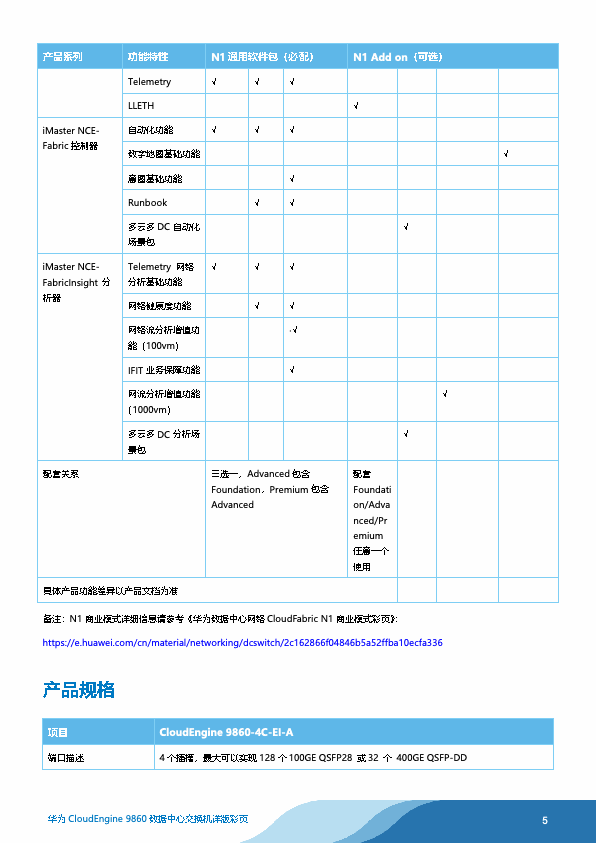

In [100]:
im = pdf.pages[4].to_image()
im

In [15]:
table = p0.extract_table()
table 

[['',
  '产品系列',
  '',
  '',
  '功能特性',
  '',
  '',
  'N1通用软件包（必配）',
  None,
  None,
  '',
  '',
  'N1 Add on（可选）',
  None,
  None,
  None,
  ''],
 ['',
  None,
  None,
  'Telemetry',
  None,
  None,
  '√',
  None,
  '√',
  '√',
  None,
  '',
  None,
  '',
  '',
  '',
  None],
 [None,
  None,
  None,
  'LLETH',
  None,
  None,
  '',
  None,
  '',
  '',
  None,
  '√',
  None,
  '',
  '',
  '',
  None],
 ['iMaster NCE-\nFabric控制器',
  None,
  None,
  '自动化功能',
  None,
  None,
  '√',
  None,
  '√',
  '√',
  None,
  '',
  None,
  '',
  '',
  '',
  None],
 [None,
  None,
  None,
  '数字地图基础功能',
  None,
  None,
  '',
  None,
  '',
  '',
  None,
  '',
  None,
  '',
  '',
  '√',
  None],
 [None,
  None,
  None,
  '意图基础功能',
  None,
  None,
  '',
  None,
  '',
  '√',
  None,
  '',
  None,
  '',
  '',
  '',
  None],
 [None,
  None,
  None,
  'Runbook',
  None,
  None,
  '',
  None,
  '√',
  '√',
  None,
  '',
  None,
  '',
  '',
  '',
  None],
 [None,
  None,
  None,
  '多云多DC自动化\n场景包',
  None,
  None,


In [36]:
import pandas as pd
import numpy as np
col = []
for i in table[0]:
    
    if i is not None:
        col.append(i)
        pre = i
    else:
        col.append(pre)
    
df = pd.DataFrame(table[1:], columns=col)
df.replace(np.nan, '', inplace=True)
for i in range(len(df.columns)):
    df.iloc[:,i]=df.iloc[:,i].str.replace("\n", '')
df

,,产品系列,,,功能特性,,,N1通用软件包（必配）,N1通用软件包（必配）,N1通用软件包（必配）,,,N1 Add on（可选）,N1 Add on（可选）,N1 Add on（可选）,N1 Add on（可选）,
0,,,,Telemetry,,,√,,√,√,,,,,,,
1,,,,LLETH,,,,,,,,√,,,,,
2,iMaster NCE-Fabric控制器,,,自动化功能,,,√,,√,√,,,,,,,
3,,,,数字地图基础功能,,,,,,,,,,,,√,
4,,,,意图基础功能,,,,,,√,,,,,,,
5,,,,Runbook,,,,,√,√,,,,,,,
6,,,,多云多DC自动化场景包,,,,,,,,,,√,,,
7,iMaster NCE-FabricInsight 分析器,,,Telemetry 网络分析基础功能,,,√,,√,√,,,,,,,
8,,,,网络健康度功能,,,,,√,√,,,,,,,
9,,,,网络流分析增值功能（100vm）,,,,,,·√,,,,,,,


In [38]:
df.to_markdown().replace(" ",'')

'|||产品系列|||功能特性|||N1通用软件包（必配）|N1通用软件包（必配）|N1通用软件包（必配）|||N1Addon（可选）|N1Addon（可选）|N1Addon（可选）|N1Addon（可选）||\n|---:|:---------------------------------|:-----------|:---|:----------------------------|:-----------|:---|:----------------------------------------------------|:-----------------------|:-----------------------|:-----------------------|:---|:--------------------------------------------|:--------------------|:--------------------|:--------------------|:--------------------|:---|\n|0||||Telemetry|||√||√|√||||||||\n|1||||LLETH||||||||√||||||\n|2|iMasterNCE-Fabric控制器|||自动化功能|||√||√|√||||||||\n|3||||数字地图基础功能||||||||||||√||\n|4||||意图基础功能||||||√||||||||\n|5||||Runbook|||||√|√||||||||\n|6||||多云多DC自动化场景包||||||||||√||||\n|7|iMasterNCE-FabricInsight分析器|||Telemetry网络分析基础功能|||√||√|√||||||||\n|8||||网络健康度功能|||||√|√||||||||\n|9||||网络流分析增值功能（100vm）||||||·√||||||||\n|10||||IFIT业务保障功能||||||√||||||||\n|11||||网流分析增值功能（1000vm）|||||||||||√|||\n|12||||多云多DC分析场景包||||||||||√||||\n|13|配套关系||||||三选一，Advanced

In [142]:
from langchain.schema import Document
import pandas as pd
import numpy as np

def table2md(table):
    
    col = []
    for i in table[0]:
        
        if i is not None:
            col.append(i)
            pre = i
        else:
            col.append(pre)
        
    df = pd.DataFrame(table[1:], columns=col)
    df.replace(np.nan, '', inplace=True)
    for i in range(len(df.columns)):
        df.iloc[:,i]=df.iloc[:,i].str.replace("\n", '')
    return df

def judge_next(pdf, cnt, df):
    next_page = pdf.pages[cnt]
    next_page_tables = next_page.find_tables()  # 如果是跨页表格，当前页只有一个表格  
    if next_page_tables == []:
        return None, False
    print("跨页合并 ，当前page:",cnt)
    min_x, min_y, max_x, max_y = next_page.bbox[0], next_page.bbox[1], next_page.bbox[2], next_page.bbox[3]
    print("table坐标：",next_page_tables)
    x1,y1,x2,y2 = next_page_tables[0].bbox
    df_ = table2md(next_page.within_bbox((0,0,max_x,max_y)).extract_table())

    if  df.columns.tolist() == df_.columns.tolist():
        # print(df.info())
        # print("---"*100)
        # print(df_.info())
        ps.append(cnt)
        new_df = pd.concat([df, df_],axis=0)
        print(new_df.info())
        return new_df, True 
    else:
        return None, False
    
def continue_table(pdf, p, table):
    
    cnt = p
    df = table2md(table) # 第一页结尾的表格
    print("第一页结尾表格：")
    print(df.info())
    flag = True
    while flag:
        cnt+=1
        new_df, flag = judge_next(pdf, cnt, df)
    if new_df is None:
        return df.to_markdown().replace(" ",'')
    else:
        return new_df.to_markdown().replace(" ",'')

def parse_table():
    """
    1. 遍历每一页，如果该页有表格
        - 按照bbox去提取表格，转md格式，并删掉原来提取表格的文字（rfind，lfind替换）
    2. 跨页表格
        - 判断当前页的结尾是否有表格 or 判断下一页头部是否有表格，有表格 -》合并
    """
    import pdfplumber
    pdf = pdfplumber.open("../files/swan.pdf")
    doc = []
    global ps
    ps = []
    for p in range(len(pdf.pages)):
        print("被跳过的页数:",ps)
        if p in ps:
            continue
        print("当前页面是:",p)
        page = pdf.pages[p]
        min_x, min_y, max_x, max_y = page.bbox[0], page.bbox[1], page.bbox[2], page.bbox[3]
        page_text = ""
        if page.find_tables() != []:
            tables = page.find_tables()
            # print(tables)
            tables_pos = [tables[i].bbox for i in range(len(tables))]
            # print(tables_pos)
            for idx, pos in enumerate(tables_pos):
                x1,y1,x2,y2 = pos

                if idx == 0:
                    pre_text = page.within_bbox((min_x,min_y,x2,y1)).extract_text()
                else:
                    pre_text = page.within_bbox((x1_,y2_,x2,y1)).extract_text()
                page_text += pre_text

                # 判断是否是跨页表格，需要递归
                if max_y - y2 <= 100:
                    table_ = continue_table(pdf, p, page.within_bbox((x1,y1,max_x, max_y)).extract_table())
                    page_text += table_
                else:
                    table_ = table2md(page.within_bbox((x1,y1,x2,y2)).extract_table()).to_markdown().replace(" ",'')
                    page_text += table_
                
                x1_, y1_, x2_, y2_ = pos
                    
            # 有页面尾，一定要加
            pos_text = page.within_bbox((tables_pos[-1][0],tables_pos[-1][3],max_x,max_y)).extract_text()
            page_text += pos_text
            
        else:
            text = page.extract_text()
            page_text += text
            
        doc.append(
            Document(
                page_content=page_text
            )

        )
    return doc
        

In [143]:
parse_table()

被跳过的页数: []
当前页面是: 0
被跳过的页数: []
当前页面是: 1
被跳过的页数: []
当前页面是: 2
被跳过的页数: []
当前页面是: 3
第一页结尾表格：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0                  4 non-null      object
 1   产品系列           4 non-null      object
 2                  4 non-null      object
 3                  4 non-null      object
 4   功能特性           4 non-null      object
 5                  4 non-null      object
 6                  4 non-null      object
 7   N1通用软件包（必配）    4 non-null      object
 8   N1通用软件包（必配）    4 non-null      object
 9   N1通用软件包（必配）    4 non-null      object
 10                 4 non-null      object
 11                 4 non-null      object
 12  N1 Add on（可选）  4 non-null      object
 13  N1 Add on（可选）  4 non-null      object
 14  N1 Add on（可选）  4 non-null      object
 15  N1 Add on（可选）  4 non-null      object
 16                 4 non-null      

[Document(page_content='彩页\n华为CloudEngine 9860-4C-\nEI-A数据中心交换机详版彩页\nCloudEngine 9860-4C-EI-A 系列是华为公司面向数据中心推\n出的新一代高性能、高密度、低时延灵活插卡以太网交换机。\nwww.huawei.com'),
 Document(page_content='产品概述\nCloudEngine 9860-4C-EI-A系列是华为公司面向数据中心推出的新一代高性能、高密度、低时延以太网灵活插卡交换机。\nCloudEngine 9860-4C-EI-A系列采用先进的硬件结构设计，提供高密度的400GE/100GE/40GE端口，软件平台基于华为新一\n代的VRP8操作系统，支持丰富的数据中心特性。CloudEngine 9860-4C-EI-A系列可以与CloudEngine\n16800/8800/6800/5800配合构建弹性、虚拟和高品质的数据中心网络，满足云计算时代数据中心对网络的需求。\nCloudEngine 9860-4C-EI-A系列交换机定位于数据中心的核心或汇聚，帮助企业和运营商构建面向云计算时代的数据中心网络\n平台，也可以用于园区网的核心或汇聚。\n产品型号和外观\nCloudEngine 9860-4C-EI-A 系列交换机包括如下产品形态：||产品描述|||产品形态||\n|----|------------|----|----|------------|----|CloudEngine 9800 插卡包括如下几种形态：||产品描述|||产品形态||\n|----|------------|----|----|------------|----|华为CloudEngine 9860数据中心交换机详版彩页 2'),
 Document(page_content='产品特点\n高密度400GE/100GE/40GE汇聚，容量超群\n\uf06c 25.6Tbps交换容量，8000Mpps转发性能，L2/L3全线速转发；\n\uf06c 最高提供32个400GE QSFP-DD接口或者128个100GE QSFP28接口，可以作为数据中心和园区网络的核心、汇聚交换\n机或接入交换机；\n\uf06c 100GE QSFP28接口，支持100GE光

In [145]:
from typing import Iterator, List, Optional

l = [1,2,3]
iter(l)